In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
iris = load_iris()

print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


In [3]:
X = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(np.int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [5]:
%%time
param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag'],
             'tol': [1e-3, 1e-4], 'max_iter':[3000, 5000, 10000],
             'C': [0.001, 0.1, 0.5, 1, 10]}
lg_reg = LogisticRegression()
lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='accuracy',
                        cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train, y_train)
params_optimal = lg_reg_cv.best_params_

print("Best Score (accuracy): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.4s


Best Score (accuracy): 0.966667
Optimal Hyperparameter Values:  {'C': 10, 'max_iter': 3000, 'solver': 'newton-cg', 'tol': 0.001}


CPU times: user 342 ms, sys: 76.7 ms, total: 419 ms
Wall time: 1.93 s


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.9s finished


In [6]:
lg_reg_clf = LogisticRegression(**params_optimal)
lg_reg_clf.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=3000, solver='newton-cg', tol=0.001)

In [7]:
print("No. of Iterations:", lg_reg_clf.n_iter_ )
print("\nWeight Intercept:", lg_reg_clf.intercept_ )
print("Weight Coefficients:", lg_reg_clf.coef_ )

No. of Iterations: [10]

Weight Intercept: [-30.10920421]
Weight Coefficients: [[4.31798376 5.54014686]]


In [8]:
y_test_predicted = lg_reg_clf.predict(X_test)
accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test)
precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Test Accuracy:  0.9666666666666667

Test Precision = 0.888889
Test Recall = 1.000000
Test F1 Score = 0.941176

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [12]:
def decision_boundary_equation_based(clf, X):
    xmin, xmax = X.min() - 1, X.max() + 1
    
    w = clf.coef_[0]
    b = clf.intercept_[0]
    
    x1 = np.linspace(xmin, xmax, 100)
    decision_boundary = -(b + w[0]*x1)/w[1]
    plt.plot(x1, decision_boundary, "k--", linewidth=3)

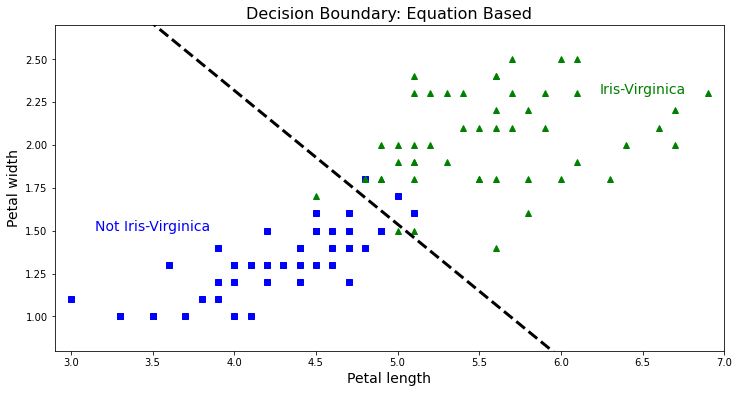

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

decision_boundary_equation_based(lg_reg_clf, X)

plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Decision Boundary: Equation Based", fontsize=16)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [14]:
def decision_boundary_various_thresholds(clf, X):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Compute the estimates for 2 classes for all new points
    y_proba = clf.predict_proba(X_new)

    
    # We only use the estimate for the class Iris-Virginica
    zz = y_proba[:, 1].reshape(x1.shape)

    # Generate the contour plot for the estimates of class 1
    contour = plt.contour(x1, x2, zz, cmap=plt.cm.brg)

    plt.clabel(contour, inline=1, fontsize=12)

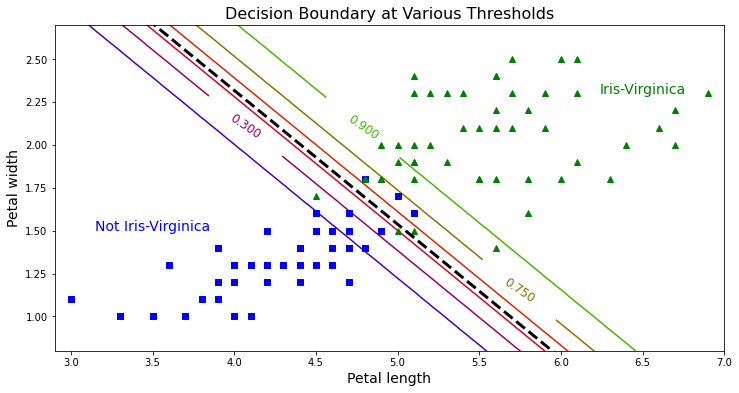

In [15]:
plt.figure(figsize=(12, 6))


# Plot the training data points
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")


# Contour plot representing class probabilities at various thresholds
decision_boundary_various_thresholds(lg_reg_clf, X)

# Let's superimpose the equation-based decision bounday
decision_boundary_equation_based(lg_reg_clf, X)

plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Decision Boundary at Various Thresholds", fontsize=16)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [16]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    plt.colorbar()

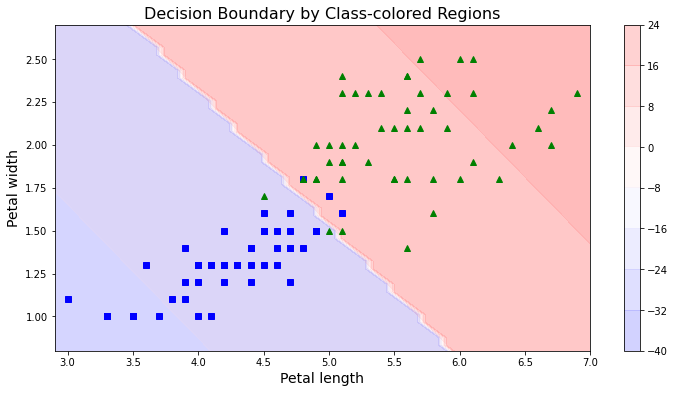

In [17]:
plt.figure(figsize=(12, 6))    

decision_boundary_class_colored(lg_reg_clf, X, plotDistanceFromHyperplane=True)

plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Decision Boundary by Class-colored Regions", fontsize=16)
plt.axis([2.9, 7, 0.8, 2.7])



plt.show()